In [1]:
cd H:\BIPARJOY\GPM\GPM DPR and GMI Combined Precipitation L2B 1.5 hours 5 km V07 (GPM_2BCMB) at GES DISC\16

H:\BIPARJOY\GPM\GPM DPR and GMI Combined Precipitation L2B 1.5 hours 5 km V07 (GPM_2BCMB) at GES DISC\16


In [2]:
import numpy as np
import h5py                  
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import warnings
warnings.filterwarnings("ignore")

In [3]:
# open the file, select the precipRate variables plus latitude and longitude
file = r'2B.GPM.DPRGMI.CORRA2022.20230616-S040637-E053909.052824.V07A.HDF5'
f = h5py.File(file,"r")
cloudice   = f['//KuKaGMI//cloudLiqWaterCont']
# CloudLiquid   = f['/KuGMI/cloudLiqWaterCont']
lon  = f["//KuKaGMI//Longitude"]
lat  = f["//KuKaGMI//Latitude"]
print('//KuKaGMI//cloudIceWaterCont dimension sizes are:',cloudice.shape)
# print('/KuGMI/cloudLiqWaterCont dimension sizes are:',CloudLiquid.shape)

//KuKaGMI//cloudIceWaterCont dimension sizes are: (7933, 49, 88)


In [4]:
# Read the data into numpy arrays and put NaN where FillValues are
cloudiceData = np.ndarray(shape=cloudice.shape,dtype=float)
cloudice.read_direct(cloudiceData)
np.place(cloudiceData, cloudiceData==cloudice.attrs.get('_FillValue'), np.nan)

In [5]:
# Subset the 2-Dimensional variable over the eye of Typhoon Mangkhut
# Choose the range of the subset, e.g.:
#   170 rows in the along-track dimension,
#   All 49 elements in the cross-track dimension,
start = 2500
end = 2695
mysub = np.mean(cloudiceData[start:end,:,:], axis = 2)
mylon = lon[start:end,:]
mylat = lat[start:end,:]

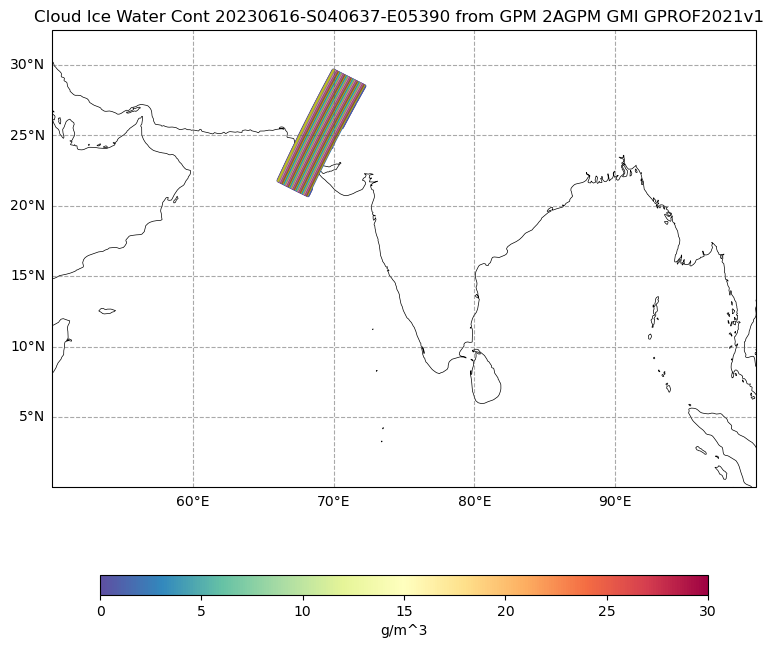

In [6]:
# Draw the subset of near-surface precipitation rate 
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([50,100,0,30])#67,90,15,35])#[66,71,16,20])
plt.title(f'Cloud Ice Water Cont {file[24:47]} from GPM 2AGPM GMI GPROF2021v1  ')

# Add coastlines and gridlines
ax.coastlines(resolution="50m",linewidth=0.5)
gl = ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=True,
                  linewidth=0.8,color='#555555',alpha=0.5,linestyle='--')
# Axis labels
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlines = True

# Plot the scatter diagram 
pp = plt.scatter( mylon, mylat, c=mysub,vmin=0,vmax=30,s=2,
                 cmap=plt.cm.Spectral_r, transform=ccrs.PlateCarree())
plt.plot(mylon, mylat)
# plt.plot(69.8,23.7)#, markersize=100,color='red')

# Add a colorbar to the bottom of the plot.
fig.subplots_adjust(bottom=0.18,left=0.06,right=0.94)
cbar_ax = fig.add_axes([0.12, 0.11, 0.76, 0.025])  
cbar = plt.colorbar(pp,cax=cbar_ax,orientation='horizontal')
cbar.set_label(label=cloudice.attrs.get('units').decode('utf-8'),size=10)
# plt.savefig(r'H:\BIPARJOY\GPM\GPM GMI (GPROF) Radiometer Precipitation Profiling L2A 1.5 hours 13 km V07 (GPM_2AGPROFGPMGMI) at GES DISC\19\\'+file+'_surfacePrecipitation.jpg')

In [74]:
mysub2 = cloudiceData[start:end,:,:]#100:176]

# Transpose the array so the along-track dimension will be the X-Axis
#   and the vertical dimension will be the Y-Axis
subset2 = np.transpose(mysub2)

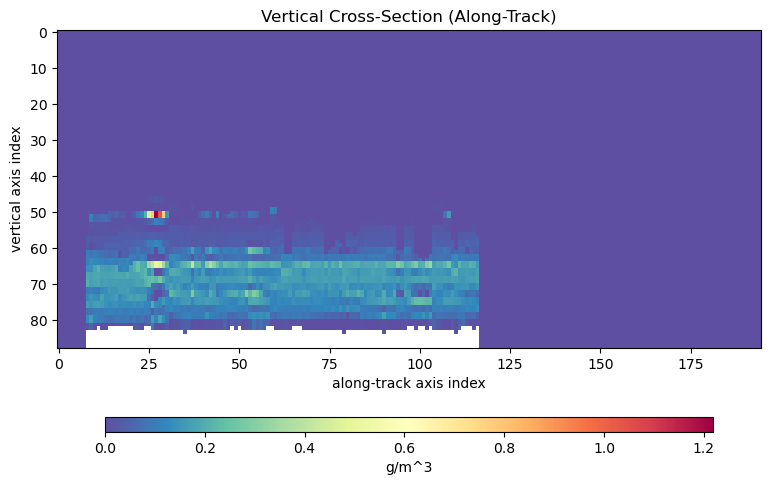

In [75]:
mysub2 = cloudiceData[start:end,12,:]#100:176]

# Transpose the array so the along-track dimension will be the X-Axis
#   and the vertical dimension will be the Y-Axis
subset2 = np.transpose(mysub2)
# Draw the ALONG-TRACK VERTICAL PROFILE
fig = plt.figure(figsize=(8,6))
ax = plt.axes()
ax.set_xlabel('along-track axis index')
ax.set_ylabel('vertical axis index')
ax.set_title('Vertical Cross-Section (Along-Track)')
pp = plt.imshow(subset2, cmap=plt.cm.Spectral_r)

# Add a colorbar to the bottom of the plot.
fig.subplots_adjust(bottom=0.15, left=0.06, right=0.94)
cbar_ax = fig.add_axes([0.12, 0.11, 0.76, 0.025])  
cbar = plt.colorbar(pp, cax=cbar_ax, orientation='horizontal')
cbar.set_label(label=cloudice.attrs.get('units').decode('utf-8'),size=10)

In [23]:
print(lon[:].min())
print(lon[:].max())

-179.99947
179.99898


In [14]:
print(mysub.shape)
print(mylon.shape)
print(mylat.shape)

(495, 49, 88)
(495, 49)
(495, 49)


In [46]:
cloudiceData.shape

(7932, 49, 88)

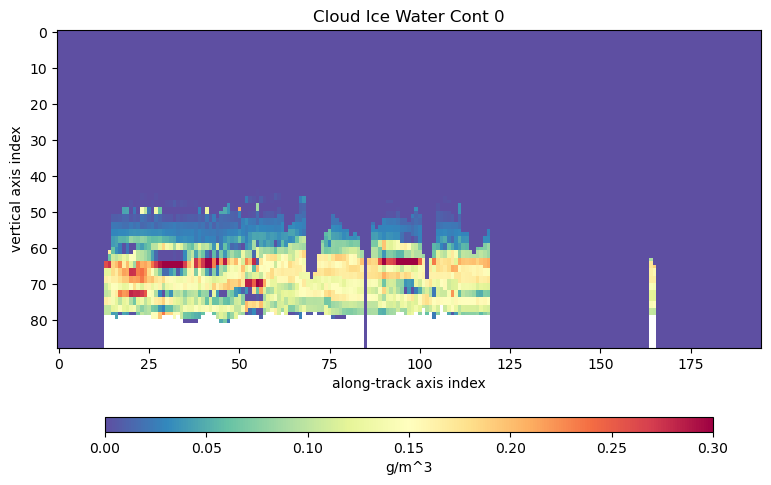

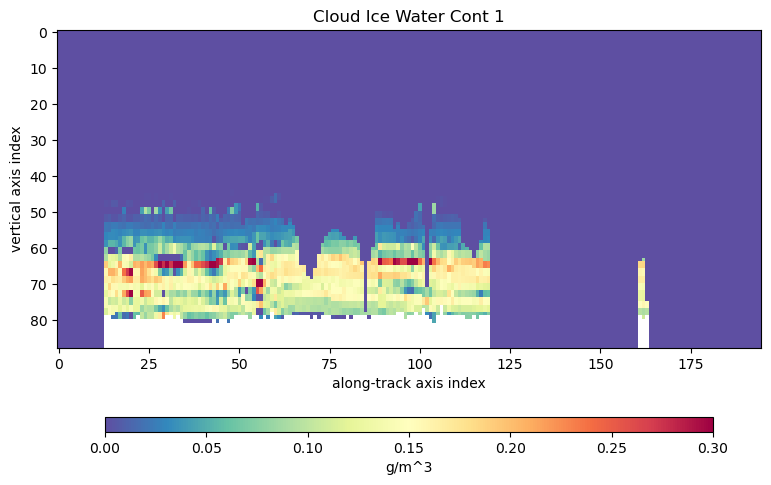

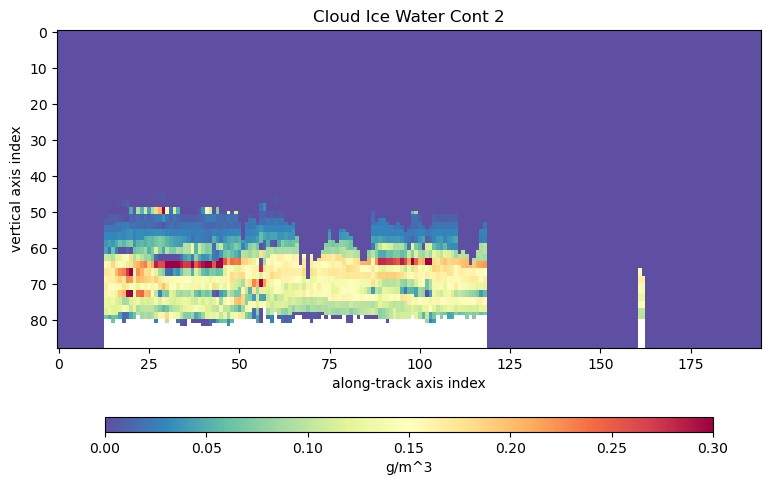

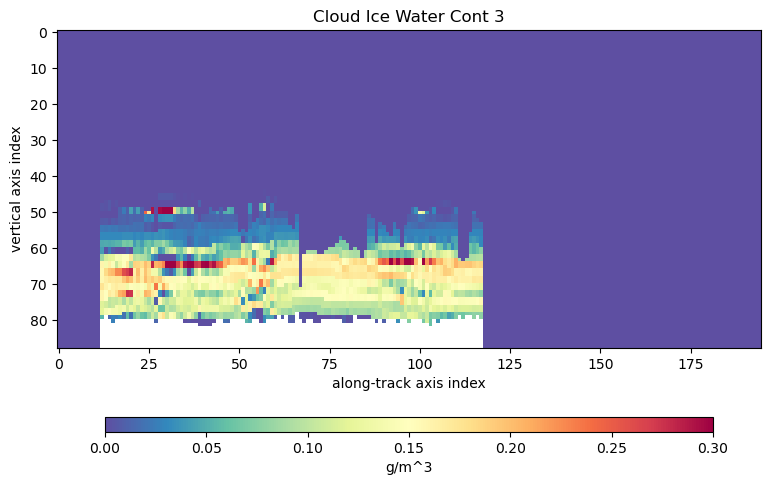

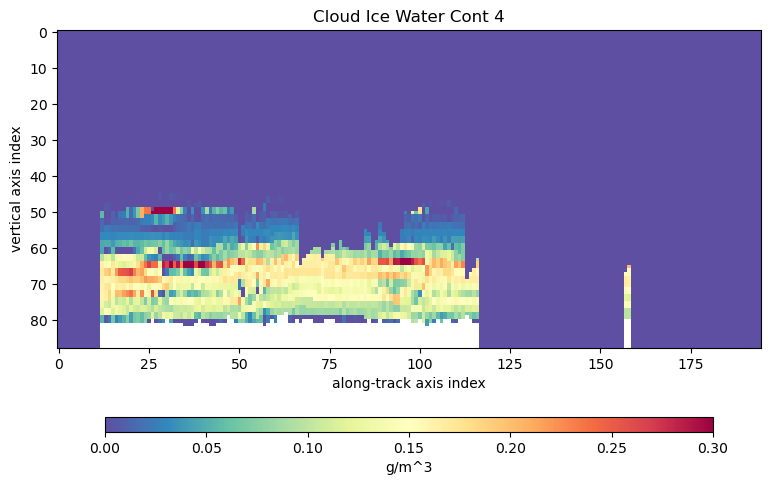

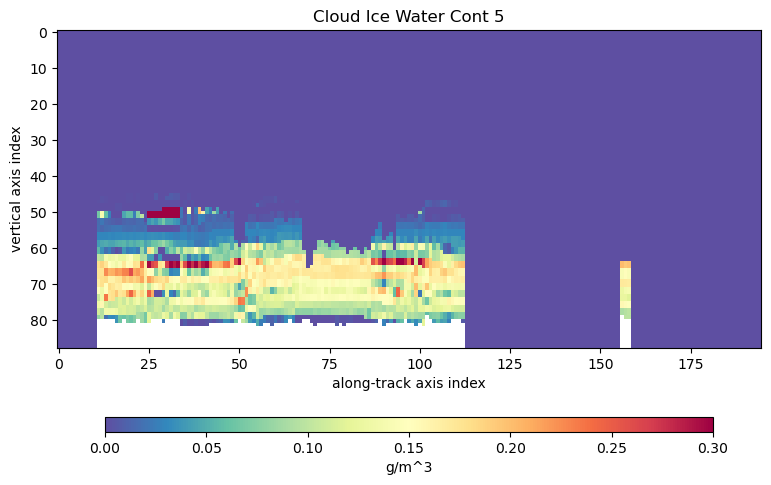

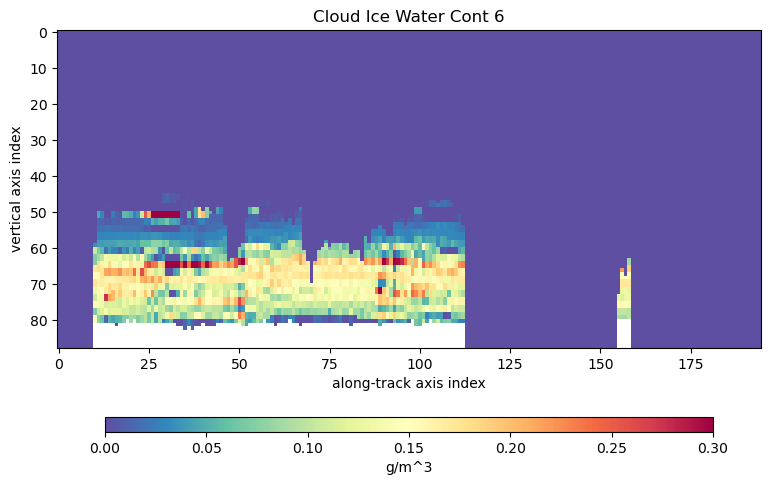

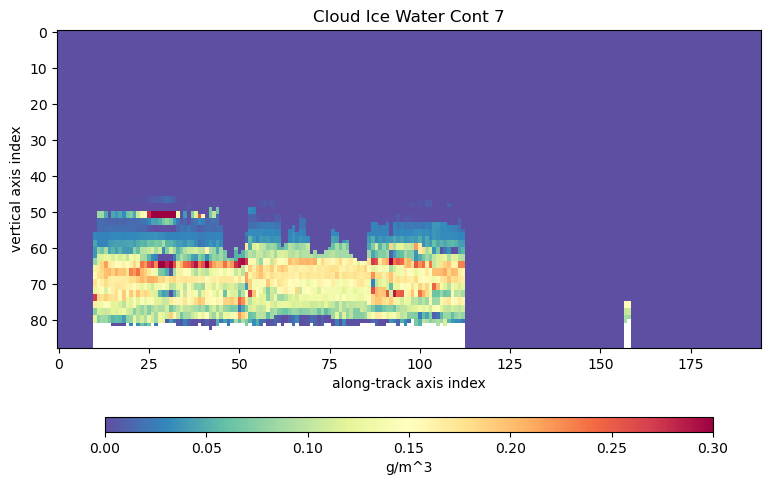

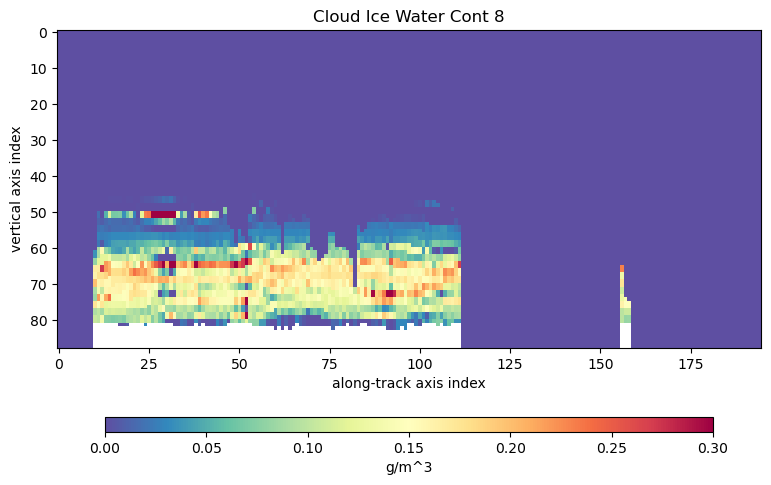

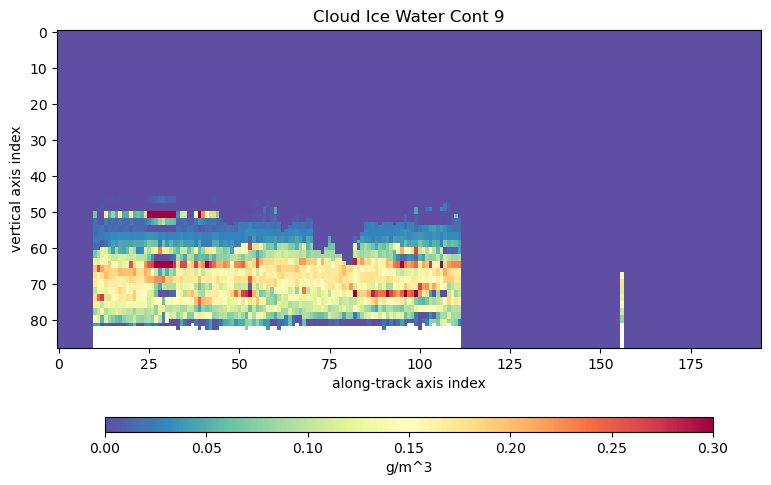

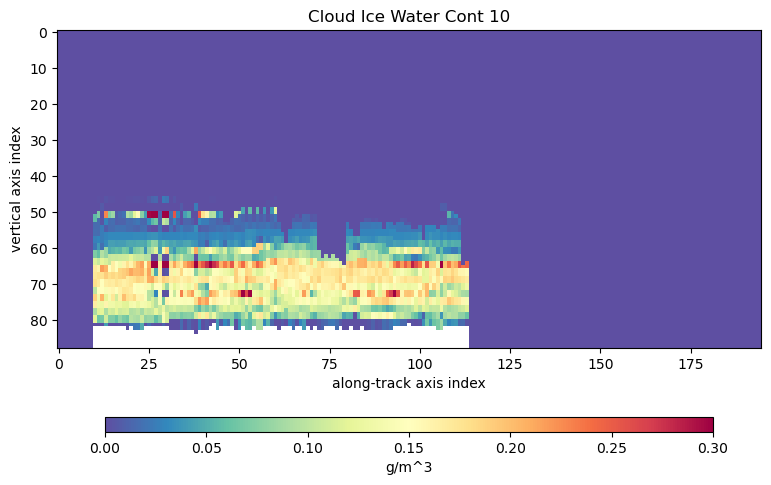

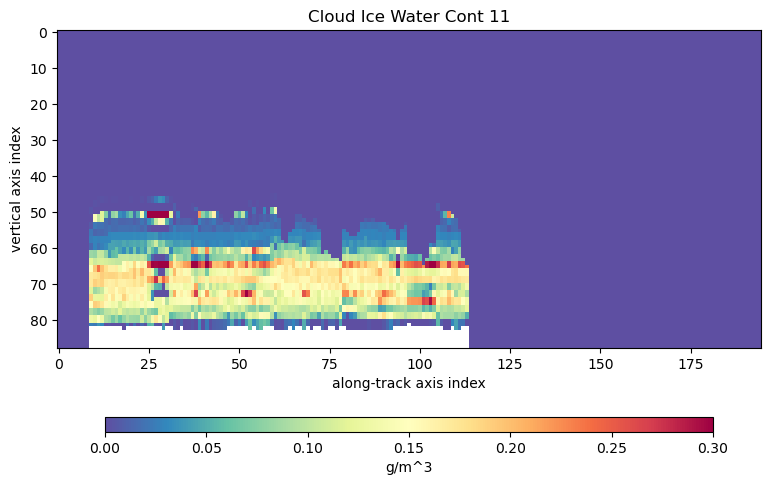

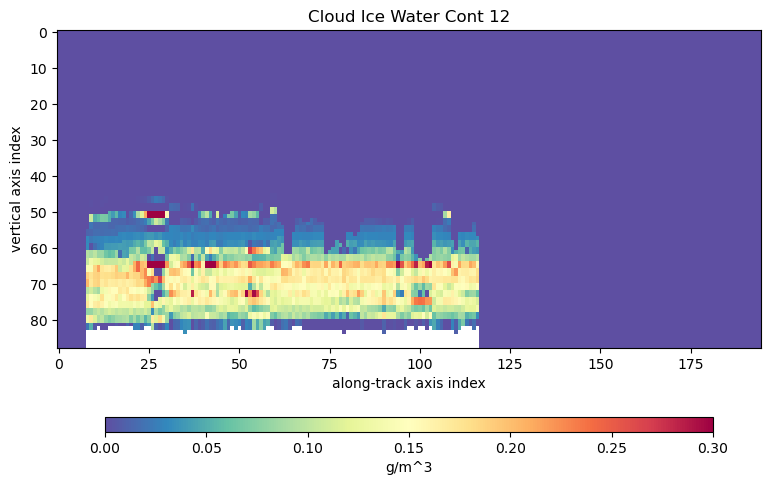

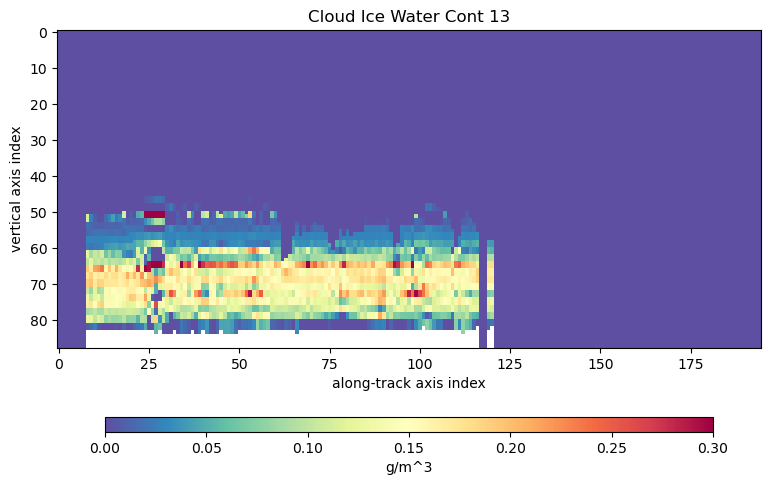

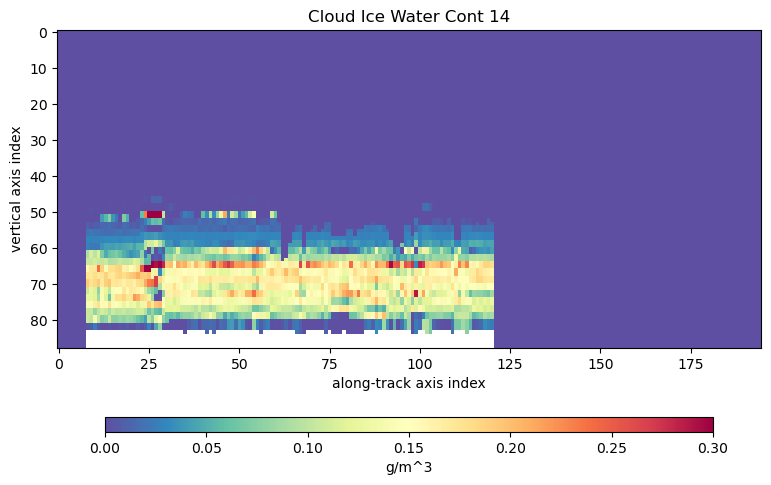

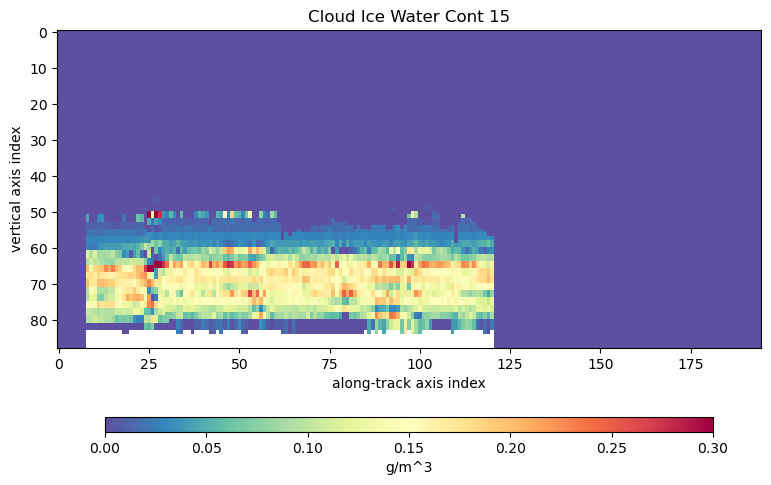

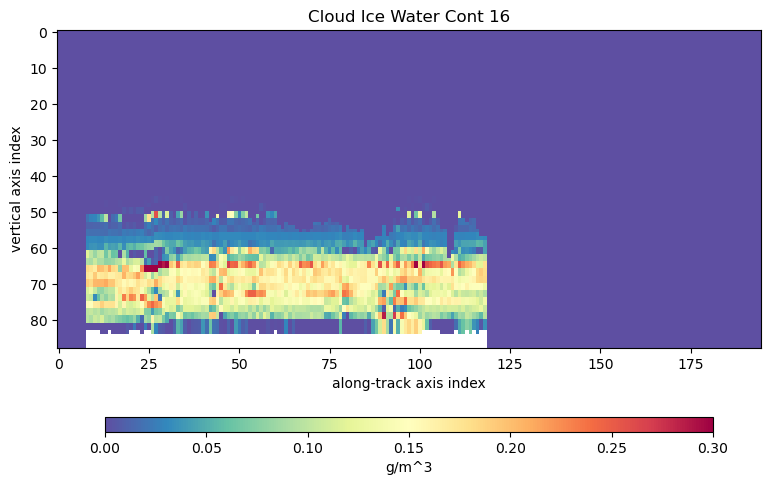

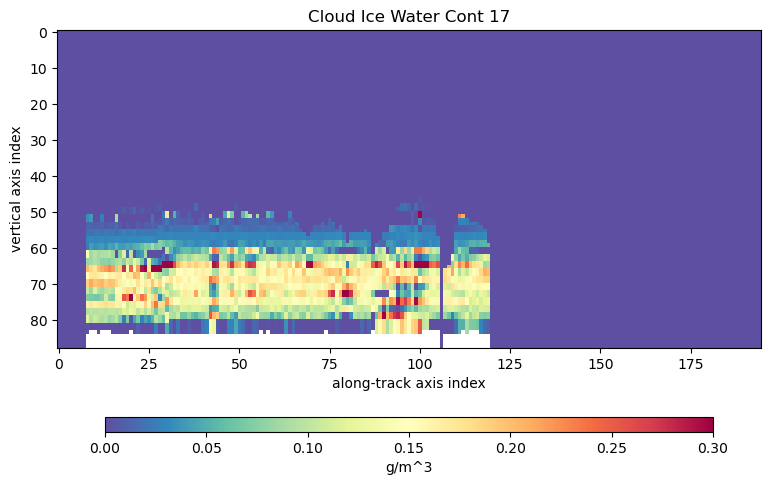

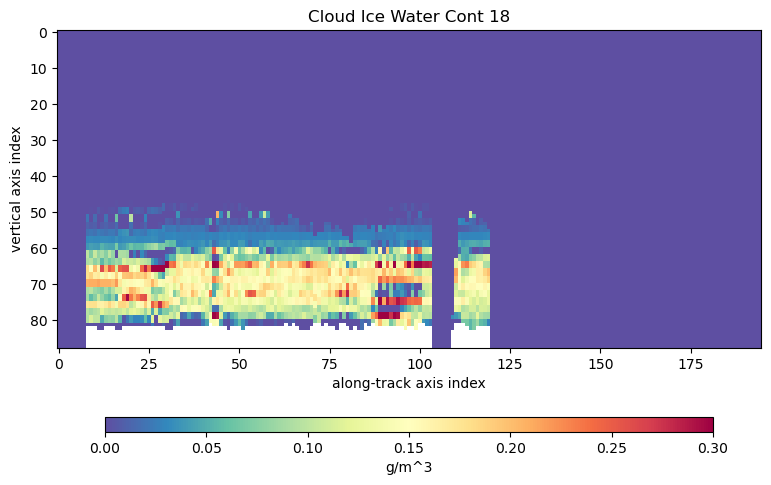

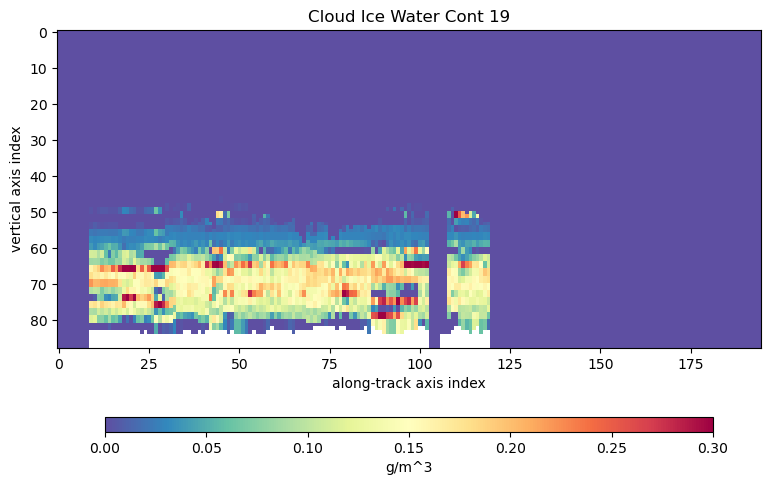

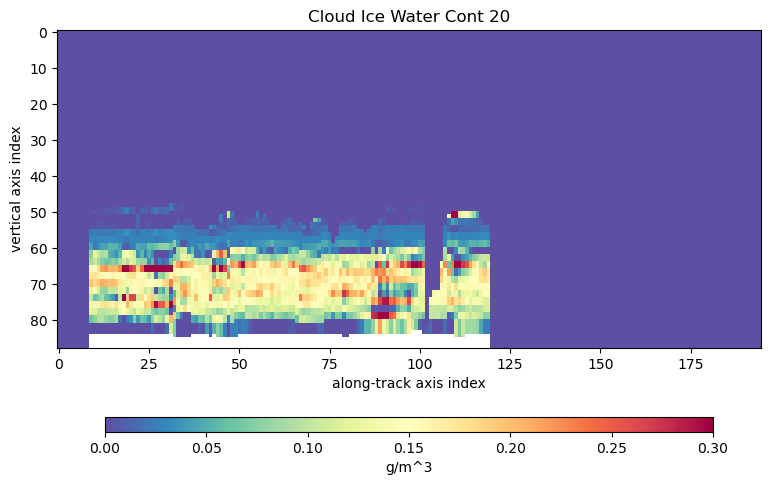

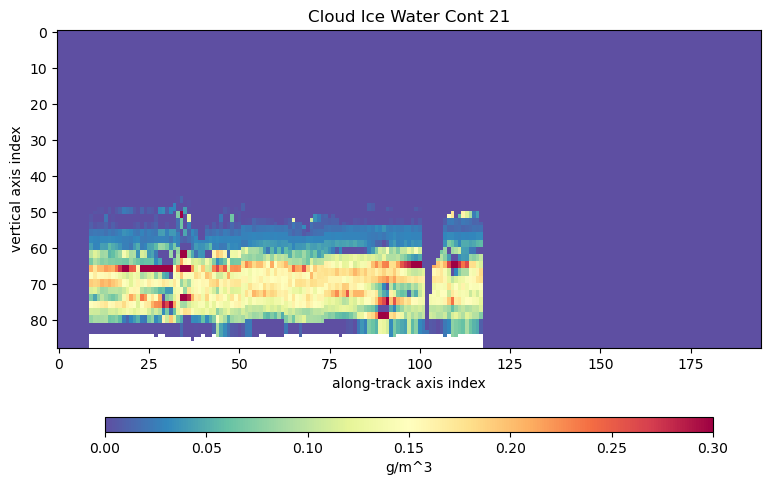

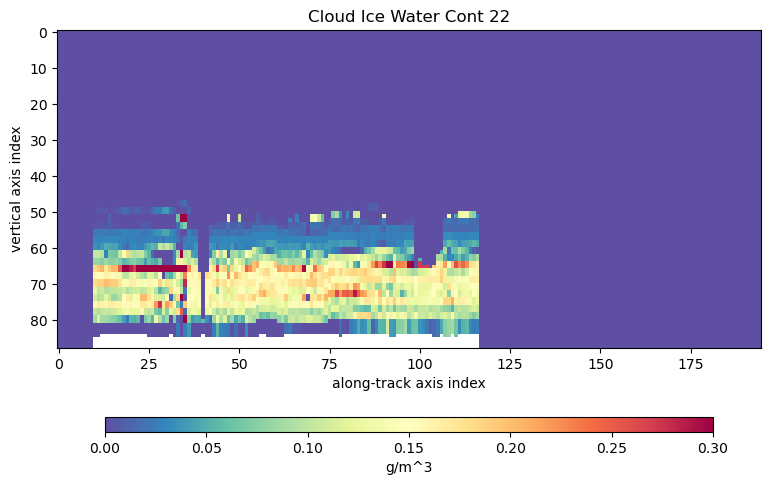

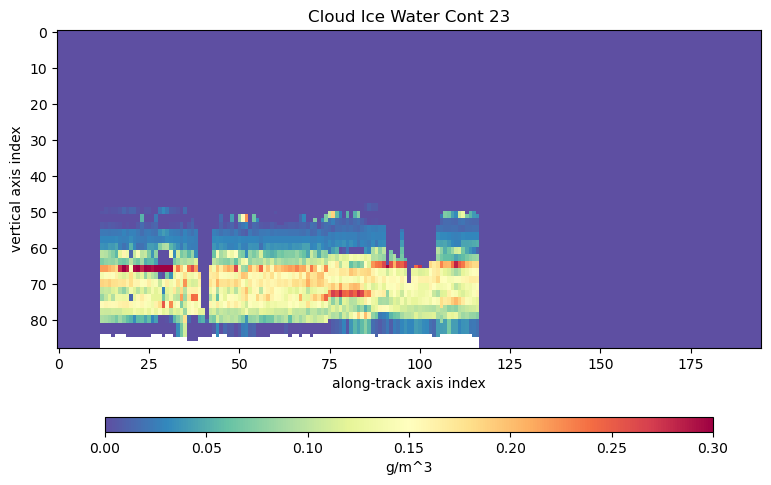

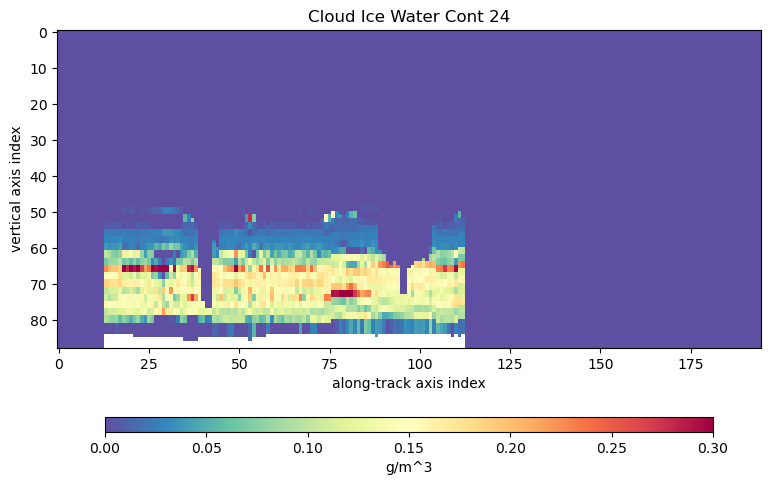

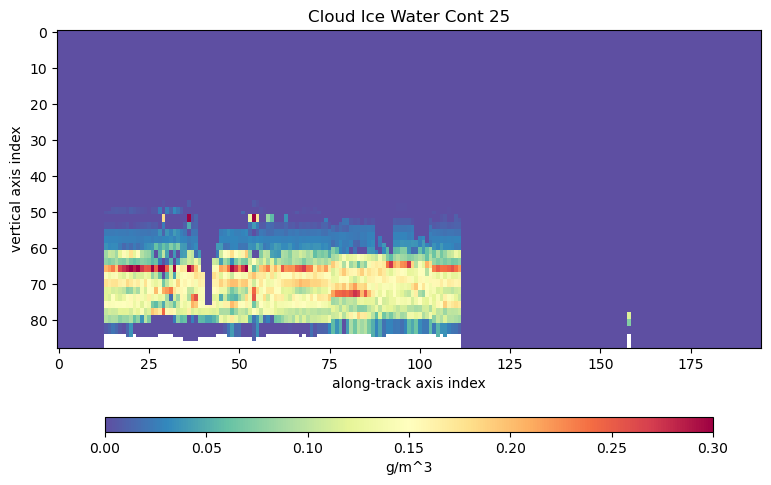

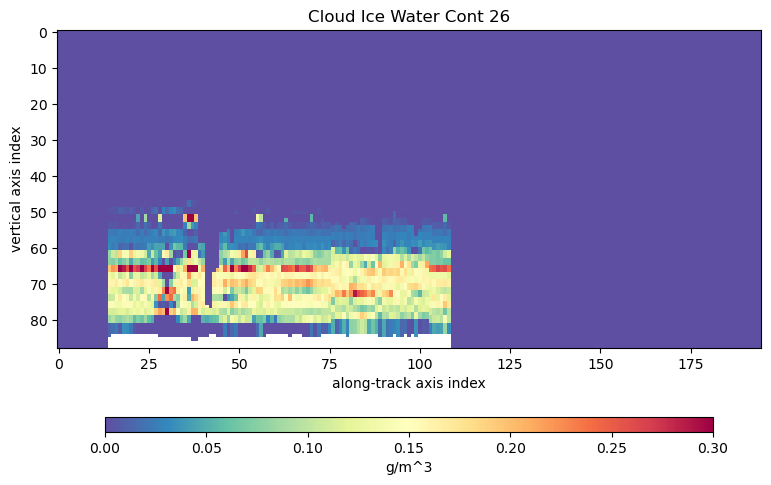

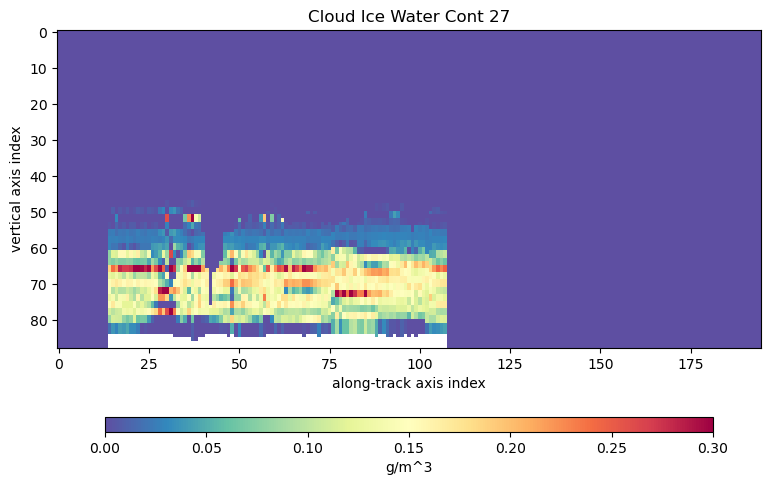

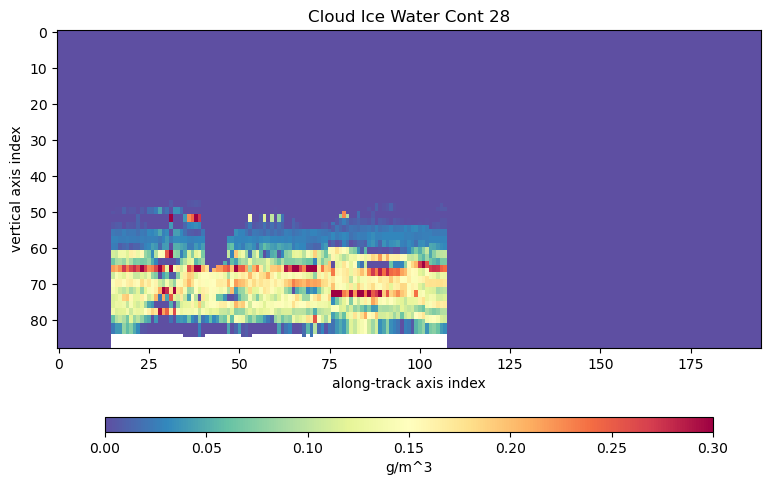

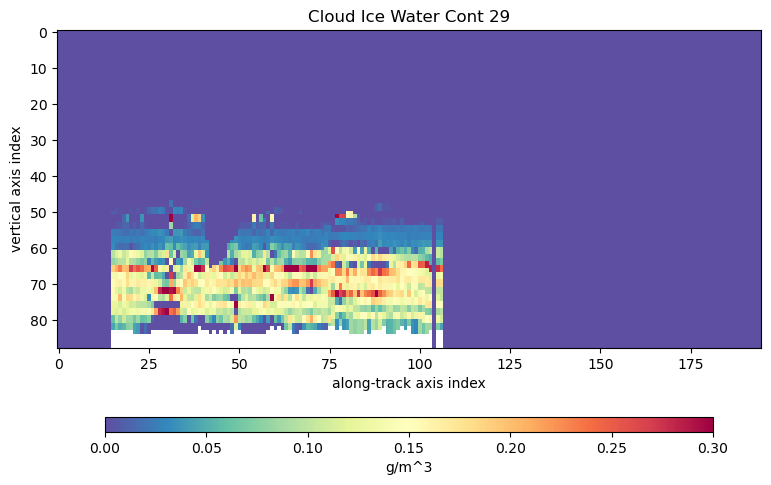

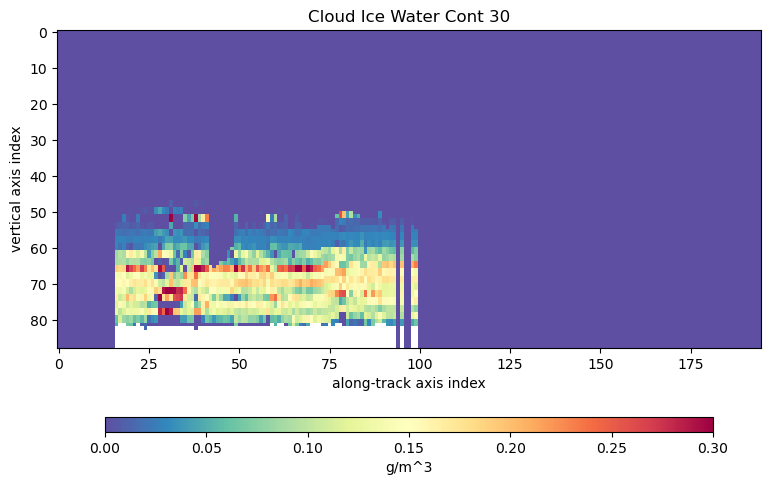

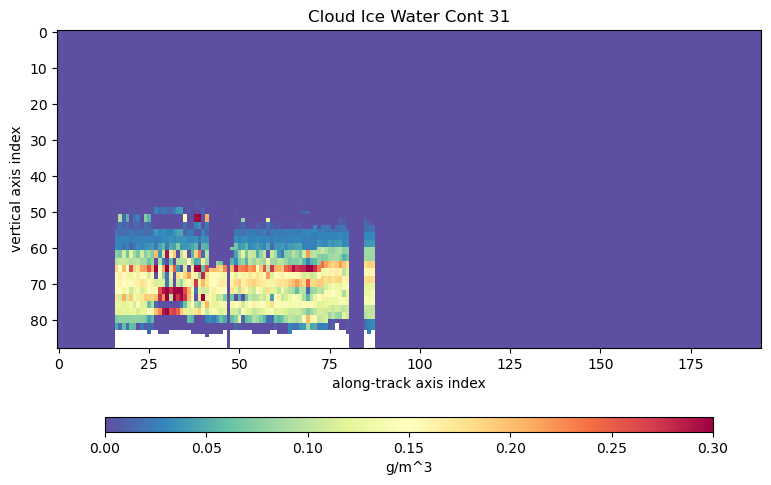

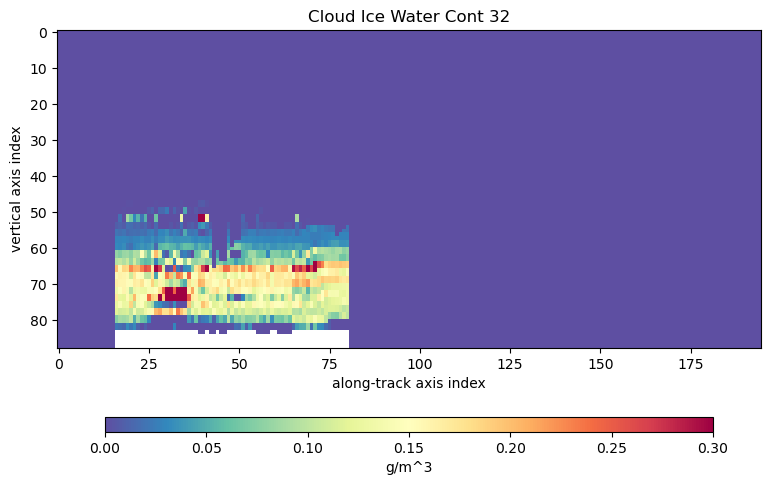

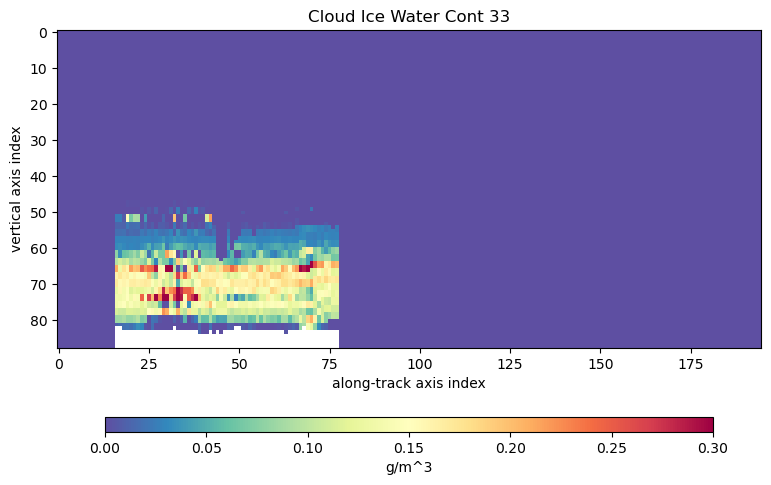

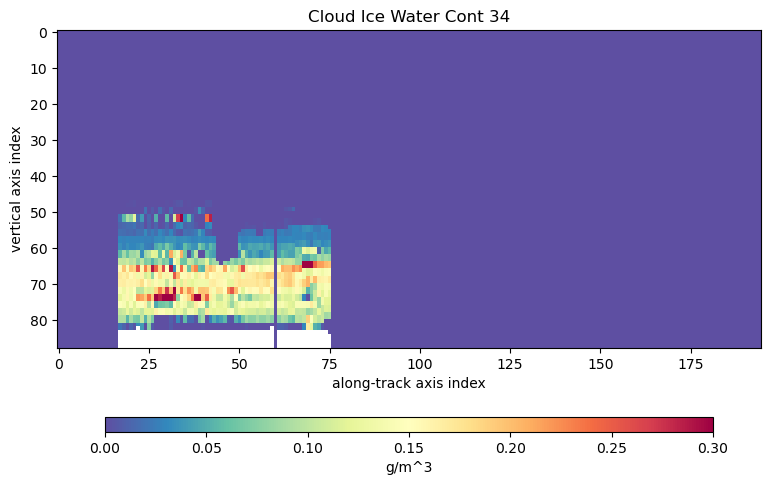

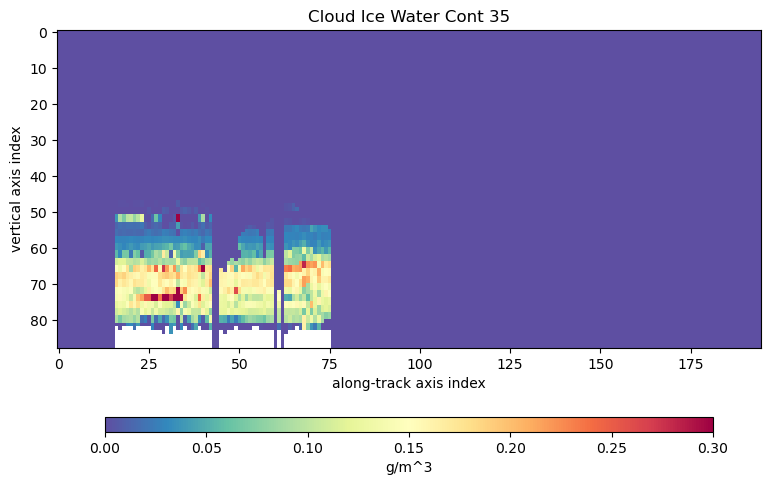

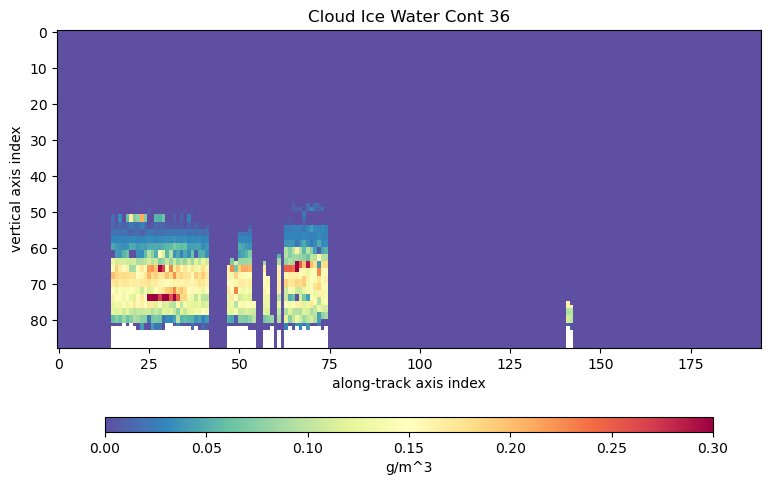

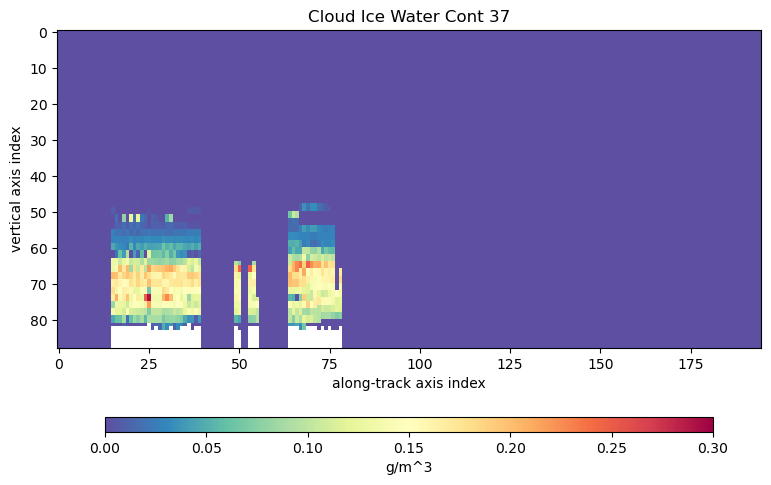

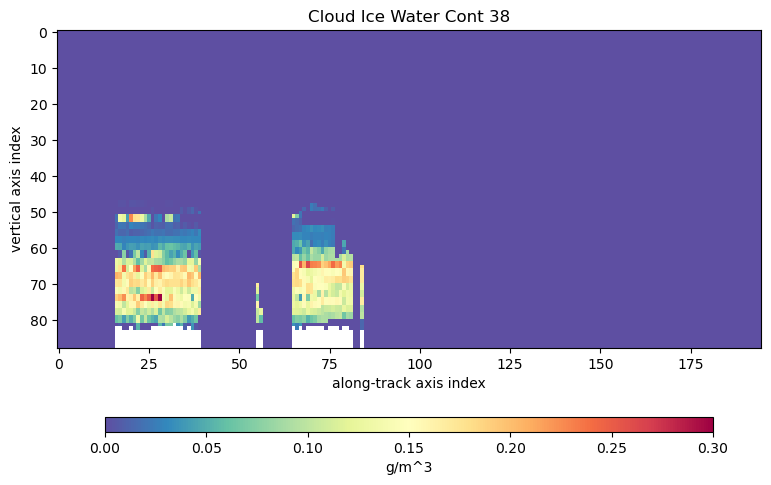

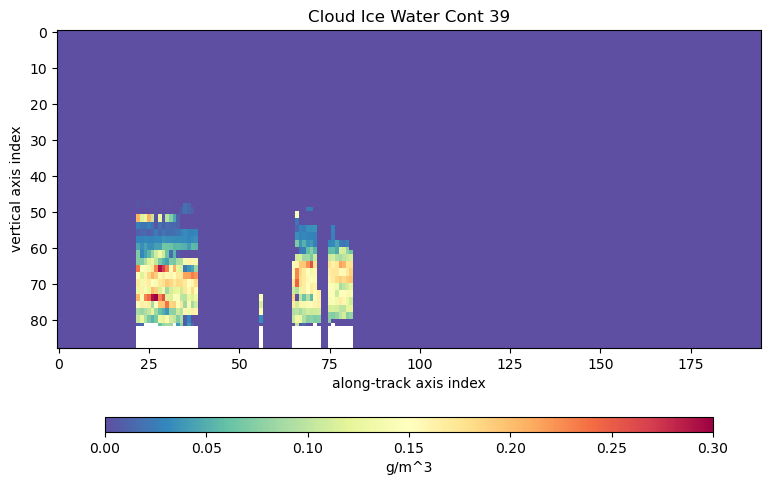

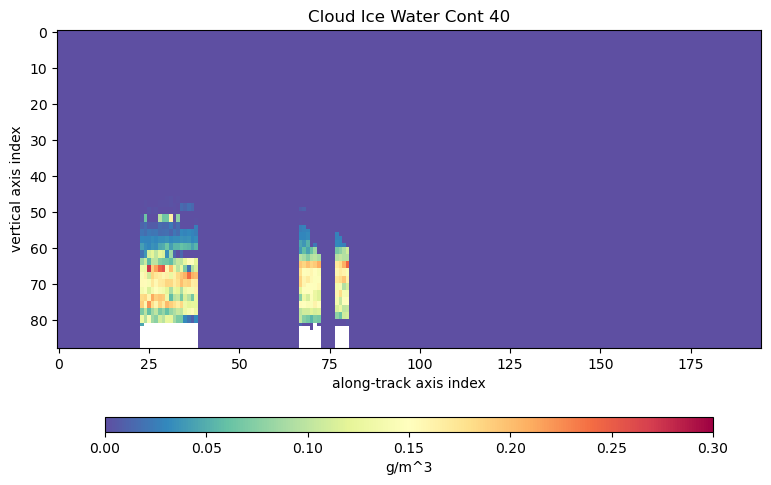

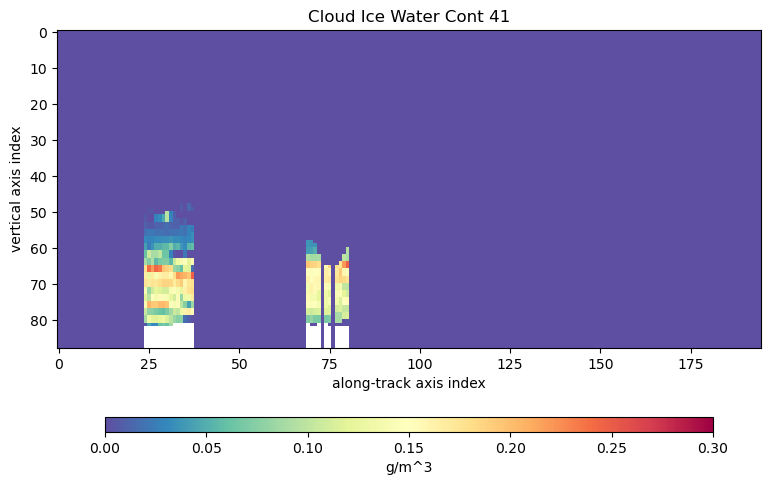

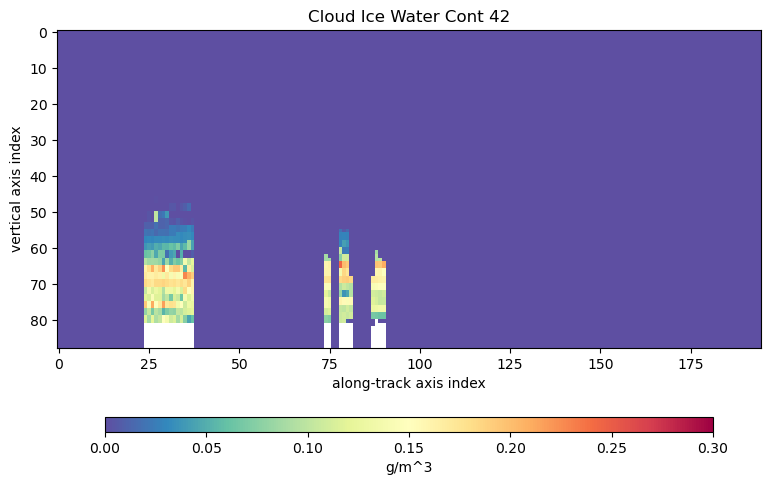

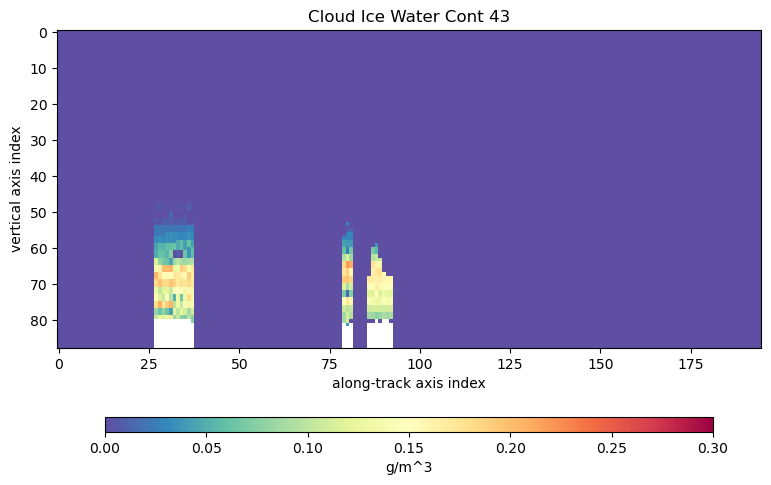

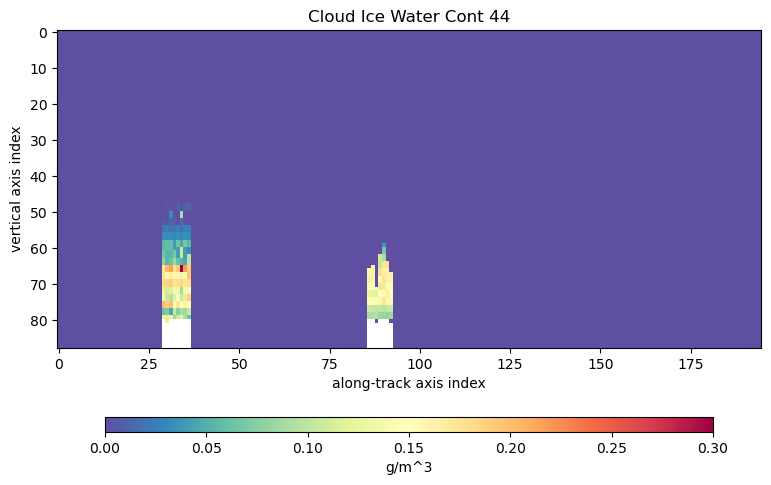

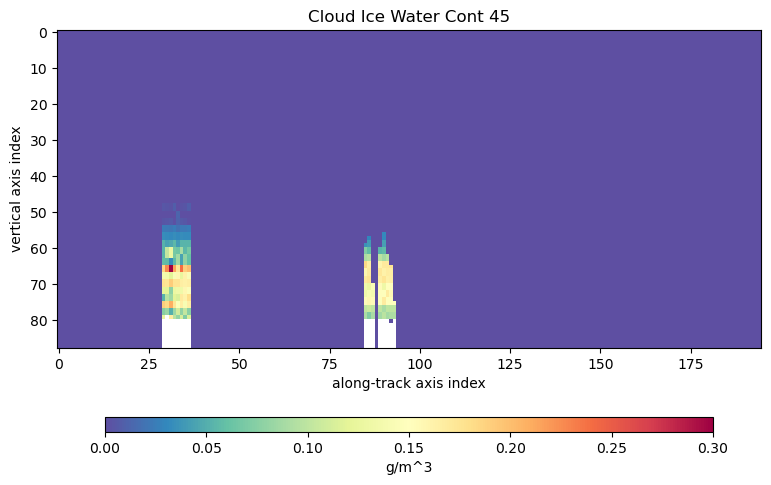

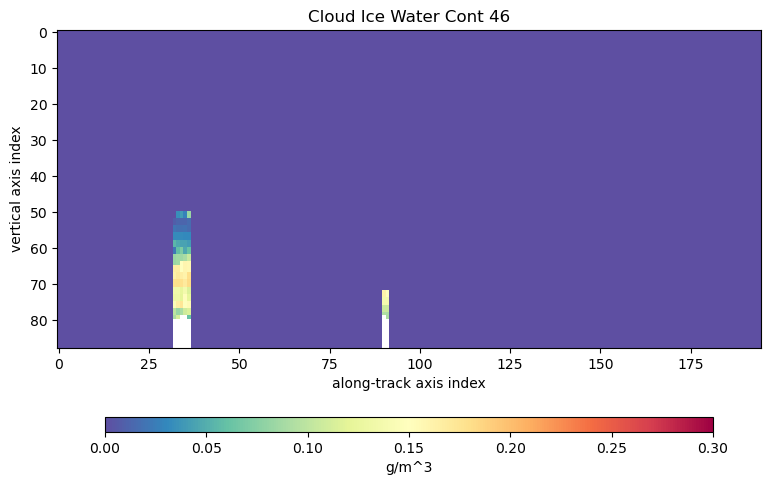

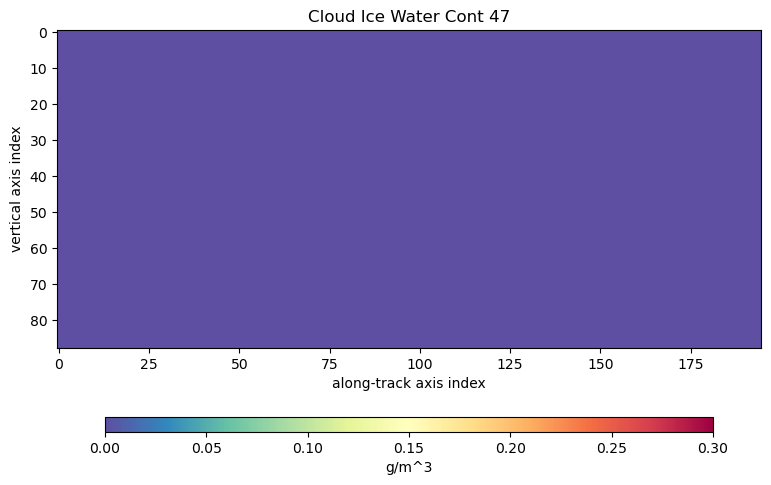

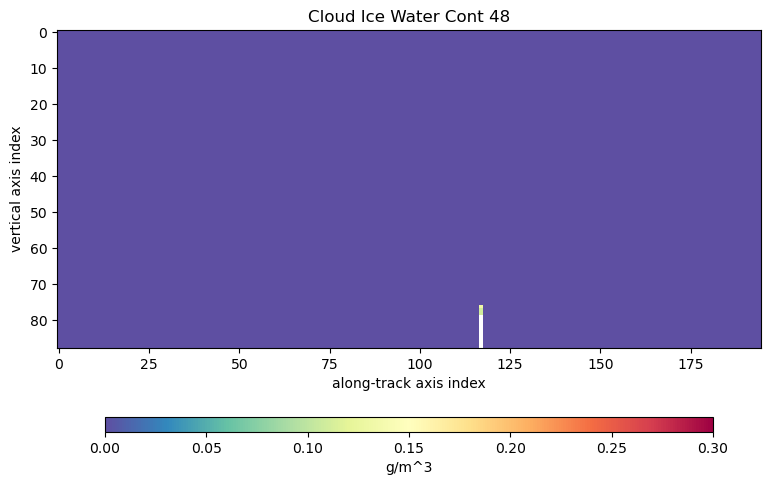

In [76]:
for i in np.arange(0,49):
    mysub2 = cloudiceData[start:end,i,:]#100:176]

# Transpose the array so the along-track dimension will be the X-Axis
#   and the vertical dimension will be the Y-Axis
    subset2 = np.transpose(mysub2)
# Draw the ALONG-TRACK VERTICAL PROFILE
    fig = plt.figure(figsize=(8,6))
    ax = plt.axes()
    ax.set_xlabel('along-track axis index')
    ax.set_ylabel('vertical axis index')
    ax.set_title(f'Cloud Ice Water Cont {str(i)}')
    pp = plt.imshow(subset2, cmap=plt.cm.Spectral_r,vmin=0,vmax=0.3)

# Add a colorbar to the bottom of the plot.
    fig.subplots_adjust(bottom=0.15, left=0.06, right=0.94)
    cbar_ax = fig.add_axes([0.12, 0.11, 0.76, 0.025])  
    cbar = plt.colorbar(pp, cax=cbar_ax, orientation='horizontal')
    cbar.set_label(label=cloudice.attrs.get('units').decode('utf-8'),size=10)
    plt.savefig(str(i)+'.jpg')